# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


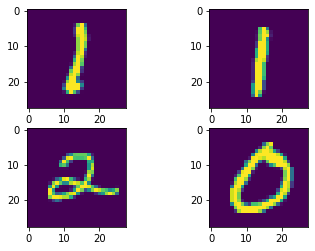

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
from numpy.random import randint
%matplotlib inline

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train[randint(low=0,high=500)])
axarr[0,1].imshow(X_train[randint(low=0,high=500)])
axarr[1,0].imshow(X_train[randint(low=0,high=500)])
axarr[1,1].imshow(X_train[randint(low=0,high=500)])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(Convolution2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(512, (3,3), activation='relu'))
model.add(Convolution2D(10, (1,1), activation='relu'))
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))




In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 512)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2268 - acc: 0.9283
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0466 - acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0336 - acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0247 - acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0195 - acc: 0.9942
Epoch 6/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0173 - acc: 0.9949
Epoch 7/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0129 - acc: 0.9957
Epoch 8/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0125 - acc: 0.9962
Epoch 9/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0112 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0092 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [36]:
print(score)

[0.03170987021580313, 0.9917]


In [0]:
y_pred = model.predict(X_test)

In [38]:
print(y_pred[:9])
print(y_test[:9])

[[4.4094621e-15 4.3900991e-07 1.6805608e-09 2.7393066e-12 1.2273391e-08
  3.2178997e-12 5.3382764e-16 9.9999952e-01 3.1980197e-16 1.2063926e-12]
 [4.0610912e-10 3.8241161e-08 1.0000000e+00 4.5077405e-12 7.2427605e-13
  5.6481818e-17 1.5935669e-11 5.1039580e-15 1.5018518e-10 1.4272452e-17]
 [2.7647800e-13 1.0000000e+00 3.5789579e-12 9.9107953e-23 4.8276483e-12
  1.9520425e-12 3.1211106e-12 1.5322292e-11 9.5759798e-12 1.0753234e-13]
 [1.0000000e+00 1.8873314e-12 5.3289386e-09 5.7076144e-17 4.0405081e-14
  1.6621257e-10 4.7184439e-08 2.8882695e-15 6.8914378e-13 1.2280402e-11]
 [7.9541906e-17 3.1846945e-10 3.2417262e-14 9.8432792e-15 1.0000000e+00
  1.7167034e-14 4.3124636e-12 4.3946030e-15 1.2930292e-09 8.0842034e-12]
 [9.5078127e-14 1.0000000e+00 4.3624880e-13 4.9016301e-25 3.7403194e-13
  4.8396221e-13 6.7229441e-13 5.5435791e-12 1.1524159e-12 1.3825443e-14]
 [1.8771694e-11 2.3882817e-06 5.2039768e-09 1.0255720e-10 9.9999464e-01
  1.5180356e-09 3.1919658e-08 2.4199841e-07 2.6195196e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

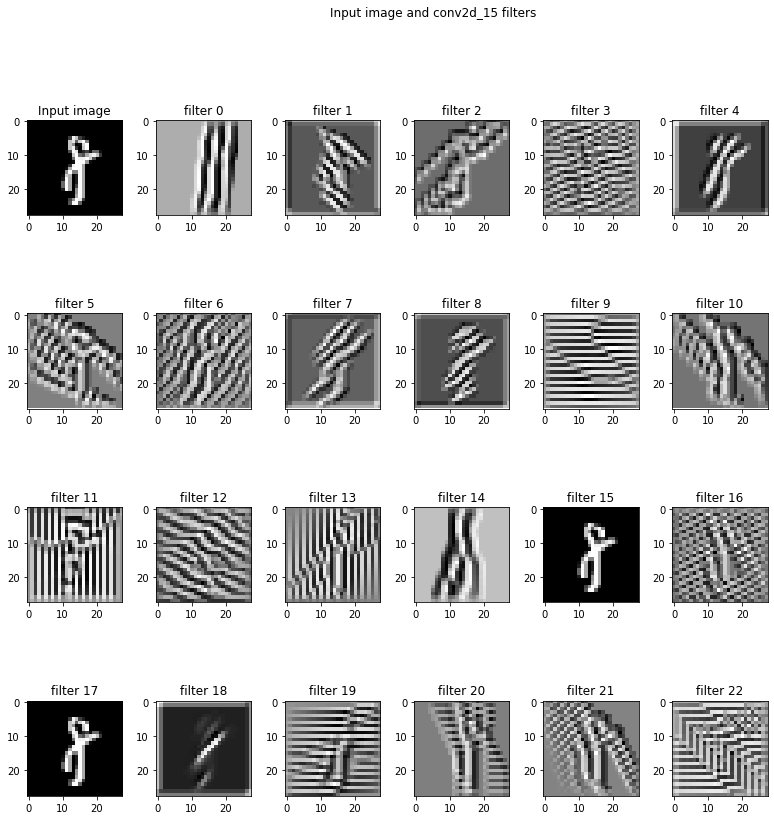

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[240]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_15'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()

    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()